In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from scipy.optimize import minimize

In [4]:
def mass_profile_file(file_path):
    hf = h5py.File(file_path, 'r')
    dist = np.array(hf['distances'])
    dens = np.array(hf['densities'])
    dens_sphere = dens * 4*np.pi*(dist**2)
    m_enc = np.zeros(len(dens))
    sum = 0
    for i in range(0, len(m_enc) - 1):
        dr = dist[i + 1] - dist[i]
        upper_rect = dens_sphere[i] * dr
        lower_rect = dens_sphere[i + 1] *dr
        trap = (upper_rect + lower_rect) / 2
        sum = sum + trap 
        m_enc[i+ 1] = sum
    return dist, m_enc

In [5]:
def radial_plotter_file_cubic(file_path, r ,f_val, slope_points):
    data = mass_profile_file(file_path)
    plt.scatter(data[0], data[1])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Radial Distance (kpc)')
    plt.ylabel('M(enclosed) (Msun)')
    plt.title('Enclosed Mass vs. Distance: f = ' + str(f_val) + ', r = '+ str(r))
    plt.ylim(10**(5), 10**(14))
    plt.xlim(10**(-3), 10**(2))
    
    del_x = (data[0][slope_points]) - (data[0][1])
    del_y = (data[1][slope_points]) - (data[1][1])
    slope = del_y/del_x
    print(data[1][slope_points])
    test_r = np.linspace(0, 1000, 1000000)
    cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
    plt.plot(test_r,cubic, 'g')
    plt.legend(['Core Slope = ' + str(slope), 'Test Slope = 3.0'])
    plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/enclosed_mass/r'+ str(r)+ '/f' + str(f_val) + '.png')

198893569.98059484


/home/mnotis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/mnotis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


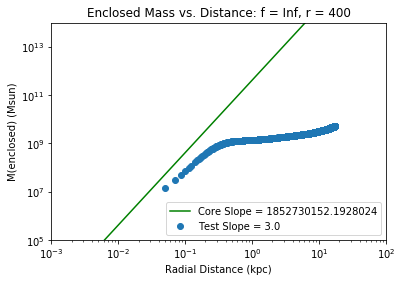

In [6]:
path_Inf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r400/radial0400.h5'
radial_plotter_file_cubic(path_Inf, 400, 'Inf', 8)

198893569.98059484


/home/mnotis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/mnotis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


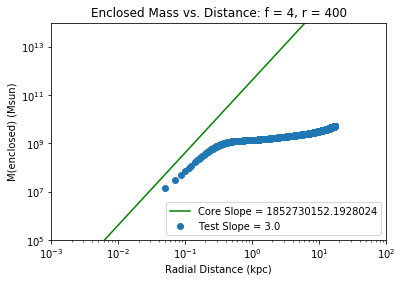

In [13]:
path_4 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f4L20T4n400r400/radial0400.h5'
radial_plotter_file_cubic(path_Inf, 400, 4, 8)

In [7]:
path_Inf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r400/radial0400.h5'
hf = h5py.File(path_Inf, 'r')
distInf = np.array(hf['distances'])
densInf = np.array(hf['densities'])
densInfsph = densInf * 4* np.pi*(distInf**2)
print('Inf[8] = ' + str(densInfsph[8]))
path_4 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f2L20T4n400r400/radial0400.h5'
hf2 = h5py.File(path_4, 'r')
dist4 = np.array(hf2['distances'])
dens4 = np.array(hf2['densities'])
dens4sph = dens4 * 4* np.pi*(dist4**2)
print('Four[8] = ' + str(dens4sph[8]))



Inf[8] = 3181986833.3634777
Four[8] = 3948235769.157549


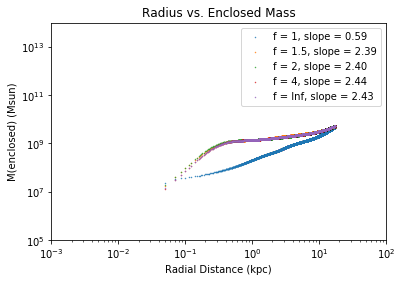

In [8]:
#plotting radial profiles of different densities

#naming file paths

path1 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1L20T4n400r400/radial0200.h5'
#path125 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.25L20T4n40r400/radial0040.h5'
path15 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.5L20T4n400r400/radial0200.h5'
#path175 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.75L20T4n40r400/radial0040.h5'
path2 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f2L20T4n400r400/radial0400.h5'
path4 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f4L20T4n400r400/radial0400.h5'
pathInf ='/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r400/radial0400.h5'

# making data
data1 = mass_profile_file(path1)
data15 = mass_profile_file(path15)
data2 = mass_profile_file(path2)
data4 = mass_profile_file(path4)
dataInf = mass_profile_file(pathInf)

#plotting data
plt.scatter(data1[0], data1[1], s = 0.20)
plt.scatter(data15[0], data15[1], s = 0.20)
plt.scatter(data2[0], data2[1], s = 0.20)
plt.scatter(data4[0], data4[1], s = 0.20)
plt.scatter(dataInf[0], dataInf[1], s = 0.20)

#computing slopes
del_x1 = np.log10(data1[0][6]) - np.log10(data1[0][1])
del_y1 = np.log10(data1[1][6]) - np.log10(data1[1][1])
slope1 = del_y1/del_x1

del_x15 = np.log10(data15[0][6]) - np.log10(data15[0][1])
del_y15 = np.log10(data15[1][6]) - np.log10(data15[1][1])
slope15 = del_y15/del_x15

del_x2 = np.log10(data2[0][6]) - np.log10(data2[0][1])
del_y2 = np.log10(data2[1][6]) - np.log10(data2[1][1])
slope2 = del_y2/del_x2

del_x4 = np.log10(data4[0][6]) - np.log10(data4[0][1])
del_y4 = np.log10(data4[1][6]) - np.log10(data4[1][1])
slope4 = del_y4/del_x4

del_xInf = np.log10(dataInf[0][6]) - np.log10(dataInf[0][1])
del_yInf= np.log10(dataInf[1][6]) - np.log10(dataInf[1][1])
slopeInf = del_yInf/del_xInf

#parameters for the plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('M(enclosed) (Msun)')
plt.title('Radius vs. Enclosed Mass')
plt.ylim(10**(5), 10**(14))
plt.xlim(10**(-3), 10**(2))

plt.legend(['f = 1, slope = ' + "%.2f" %slope1, 'f = 1.5, slope = ' + "%.2f" %slope15, 'f = 2, slope = ' + "%.2f" %slope2, 'f = 4, slope = ' + "%.2f" %slope4, 'f = Inf, slope = ' + "%.2f" %slopeInf])

plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/enclosed_mass_r400.png', dpi = 300)
#print(data[1][slope_points])
#test_r = np.linspace(0, 1000, 1000000)
#cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
#plt.plot(test_r,cubic, 'g')

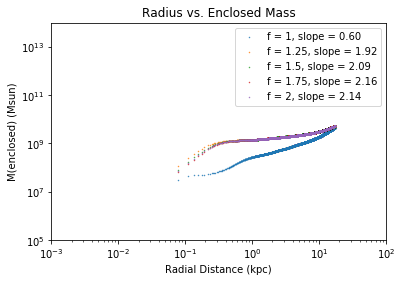

In [9]:
#plotting radial profiles of different densities

#naming file paths

path1 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1L20T4n400r256/radial0400.h5'
path125 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.25L20T4n40r256/radial0040.h5'
path15 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.5L20T4n400r256/radial0400.h5'
path175 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.75L20T4n40r256/radial0040.h5'
path2 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f2L20T4n400r256/radial0400.h5'
#path4 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f4L20T4n400r256/radial0400.h5'
#pathInf ='/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r256/radial0400.h5'

# making data
data1 = mass_profile_file(path1)
data15 = mass_profile_file(path15)
data2 = mass_profile_file(path2)
data125 = mass_profile_file(path125)
data175 = mass_profile_file(path175)

#plotting data
plt.scatter(data1[0], data1[1], s = 0.20)
plt.scatter(data125[0], data125[1], s = 0.20)
plt.scatter(data15[0], data15[1], s = 0.20)
plt.scatter(data175[0], data175[1], s = 0.20)
plt.scatter(data2[0], data2[1], s = 0.20)

#computing slopes
del_x1 = np.log10(data1[0][6]) - np.log10(data1[0][1])
del_y1 = np.log10(data1[1][6]) - np.log10(data1[1][1])
slope1 = del_y1/del_x1

del_x15 = np.log10(data15[0][6]) - np.log10(data15[0][1])
del_y15 = np.log10(data15[1][6]) - np.log10(data15[1][1])
slope15 = del_y15/del_x15

del_x2 = np.log10(data2[0][6]) - np.log10(data2[0][1])
del_y2 = np.log10(data2[1][6]) - np.log10(data2[1][1])
slope2 = del_y2/del_x2

del_x125 = np.log10(data125[0][6]) - np.log10(data125[0][1])
del_y125 = np.log10(data125[1][6]) - np.log10(data125[1][1])
slope125 = del_y125/del_x125

del_x175 = np.log10(data175[0][6]) - np.log10(data175[0][1])
del_y175= np.log10(data175[1][6]) - np.log10(data175[1][1])
slope175 = del_y175/del_x175

#parameters for the plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('M(enclosed) (Msun)')
plt.title('Radius vs. Enclosed Mass')
plt.ylim(10**(5), 10**(14))
plt.xlim(10**(-3), 10**(2))

plt.legend(['f = 1, slope = ' + "%.2f" %slope1, 'f = 1.25, slope = ' + "%.2f" %slope125, 'f = 1.5, slope = ' + "%.2f" %slope15, 'f = 1.75, slope = ' + "%.2f" %slope175, 'f = 2, slope = ' + "%.2f" %slope2])

plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/enclosed_mass_r256.png', dpi = 300)
#print(data[1][slope_points])
#test_r = np.linspace(0, 1000, 1000000)
#cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
#plt.plot(test_r,cubic, 'g')

In [ ]:
#plotting radial profiles of different densities

#naming file paths

path1 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1L20T4n400r256/radial0400.h5'
path125 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.25L20T4n40r256/radial0040.h5'
path15 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.5L20T4n400r256/radial0400.h5'
path175 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.75L20T4n40r256/radial0040.h5'
path2 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f2L20T4n400r256/radial0400.h5'
#path4 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f4L20T4n400r256/radial0400.h5'
#pathInf ='/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r256/radial0400.h5'

# making data
data1 = mass_profile_file(path1)
data15 = mass_profile_file(path15)
data2 = mass_profile_file(path2)
data125 = mass_profile_file(path125)
data175 = mass_profile_file(path175)

#plotting data
plt.scatter(data1[0], data1[1], s = 0.20)
plt.scatter(data125[0], data125[1], s = 0.20)
plt.scatter(data15[0], data15[1], s = 0.20)
plt.scatter(data175[0], data175[1], s = 0.20)
plt.scatter(data2[0], data2[1], s = 0.20)

#computing slopes
del_x1 = np.log10(data1[0][6]) - np.log10(data1[0][1])
del_y1 = np.log10(data1[1][6]) - np.log10(data1[1][1])
slope1 = del_y1/del_x1

del_x15 = np.log10(data15[0][6]) - np.log10(data15[0][1])
del_y15 = np.log10(data15[1][6]) - np.log10(data15[1][1])
slope15 = del_y15/del_x15

del_x2 = np.log10(data2[0][6]) - np.log10(data2[0][1])
del_y2 = np.log10(data2[1][6]) - np.log10(data2[1][1])
slope2 = del_y2/del_x2

del_x125 = np.log10(data125[0][6]) - np.log10(data125[0][1])
del_y125 = np.log10(data125[1][6]) - np.log10(data125[1][1])
slope125 = del_y125/del_x125

del_x175 = np.log10(data175[0][6]) - np.log10(data175[0][1])
del_y175= np.log10(data175[1][6]) - np.log10(data175[1][1])
slope175 = del_y175/del_x175

#parameters for the plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('M(enclosed) (Msun)')
plt.title('Radius vs. Enclosed Mass')
plt.ylim(10**(5), 10**(14))
plt.xlim(10**(-3), 10**(2))

plt.legend(['f = 1, slope = ' + "%.2f" %slope1, 'f = 1.25, slope = ' + "%.2f" %slope125, 'f = 1.5, slope = ' + "%.2f" %slope15, 'f = 1.75, slope = ' + "%.2f" %slope175, 'f = 2, slope = ' + "%.2f" %slope2])

plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/enclosed_mass_r256.png', dpi = 300)
#print(data[1][slope_points])
#test_r = np.linspace(0, 1000, 1000000)
#cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
#plt.plot(test_r,cubic, 'g')

In [8]:
def mass_profile_time(file_path):
    hf = h5py.File(file_path, 'r')
    dist = np.array(hf['distances'])
    dens = np.array(hf['densities'])
    dens_sphere = dens * 4*np.pi*(dist**2)
    m_enc = np.zeros(len(dens))
    sum = 0
    for i in range(0, len(m_enc) - 1):
        dr = dist[i + 1] - dist[i]
        upper_rect = dens_sphere[i] * dr
        lower_rect = dens_sphere[i + 1] *dr
        trap = (upper_rect + lower_rect) / 2
        sum = sum + trap 
        m_enc[i+ 1] = sum
    return dist, m_enc

In [67]:
def enclosed_mass_time(path, snap_num):
    enclosed_mass = np.zeros(snap_num + 1)
    for i in range(0, snap_num + 1):
        data = mass_profile_time(path + '/radial' + str(i).zfill(4) + '.h5')
        dist = data[0]
        dist_max = 16
        index = 0
        for j in range(0, len(dist)):
            if (dist[j] < dist_max):
                index = j
            else: break
        #|print(index)
        #print(data[1][index])
        enclosed_mass[i] = data[1][index]
    return enclosed_mass

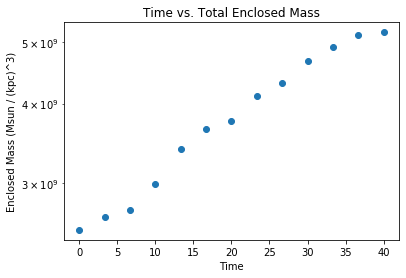

In [70]:
#testing enclosed mass
path1 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1L20T4n40r512'
mass = enclosed_mass_time(path1, 12)
time = np.linspace(0, 40, 13)
plt.scatter(time, mass)
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Enclosed Mass (Msun / (kpc)^3)')
plt.title('Time vs. Total Enclosed Mass')

plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/mass_time/f1r512d16.png')

Helper Function for distance

In [10]:
# function that calculates distances between two 3d points:

def get_distance(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2 + (a[2]- b[2])**2)

Mass Calculation Using Pixel Method


In [11]:
#Takes in a number for cube size and returns an array of the distances to center of cube as keys
#and the number of pixels at that distance as values.

def get_pixel_dict(n):
    np.zeros((n, n, n))
    center = n / 2
    dist_num = {}
    for i in range(0, n):
        for j in range(0, n):
            for k in range(0, n):
                dist = get_distance([center, center, center], [i, j, k])
                if dist not in dist_num:
                    dist_num[dist] = 1
                else:
                    times = dist_num[dist]
                    dist_num[dist] = times + 1
    dist = 
    return dist, nums

In [12]:
# saving the 256 resolution dictionary
dict = get_pixel_dict(256)

6


In [ ]:
#takes in a path, a number for the side of the cube, and a path to a file for the pixel 
# number dictionary and returns the enclosed mass using a pixel method.

def enclosed_mass_pixel_method(path, side_num, dict_path):
    

In [31]:
test = np.zeros((1, 1, 1))
print(test)

dict = get_pixel_dict(256)
print(dict.keys())

[[[0.]]]
dict_keys([221.70250336881628, 221.12666053644458, 220.55384830013736, 219.9840903338239, 219.41741043043965, 218.85383250014152, 218.2933805684451, 217.73607877428122, 217.18195136797164, 216.6310227091217, 216.08331726442927, 215.5388596054085, 214.99767440602702, 214.4597864402555, 213.92522057952868, 213.39400179011594, 212.86615513040113, 212.34170574807013, 211.820678877205, 211.303099835284, 210.78899402008636, 210.27838690650069, 209.77130404323657, 209.267771049438, 208.76781361119822, 208.27145747797513, 207.7787284589065, 207.28965241902452, 206.80425527536903, 206.3225629929989, 205.84460158090133, 205.3703970877984, 204.89997559785115, 204.4333632262601, 203.97058611476314, 203.5116704270298, 203.0566423439529, 202.60552805883654, 202.15835377248203, 201.71514568817088, 201.275930006546, 200.84073292039142, 200.40958060931118, 199.982499234308, 199.55951493226274, 199.14065381031568, 198.72594194015034, 198.31540535218136, 197.9090700296477, 197.50696190261243, 19

In [35]:
hf = h5py.File(path_to_folder + '/' + 'radial' + str(snap_number) + '.h5', 'w')
hf.create_dataset('distances', data=dist)

102
